In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
Pedigree,0
Age,0
Outcome,0


In [5]:
from sklearn.model_selection import train_test_split
x = df.drop('Outcome',axis=1).values
y = df['Outcome'].values
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
err=[]
for i in range(1,40):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(xtrain,ytrain)
  pred_i = model.predict(xtest)
  err.append(np.mean(pred_i != ytest))

Point of minima: 12


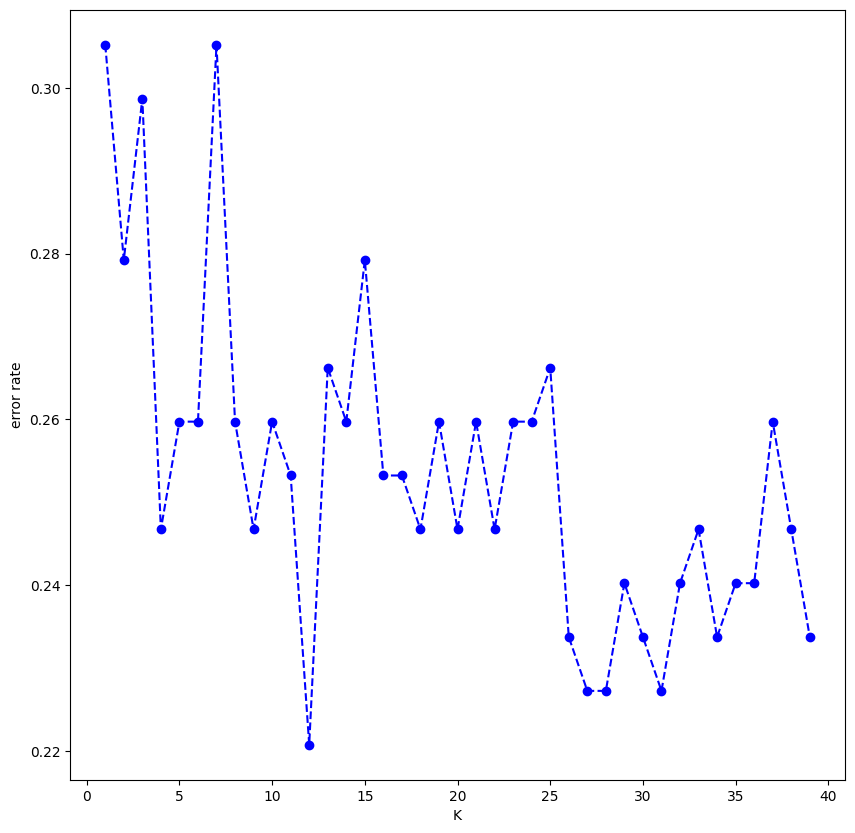

In [7]:
plt.figure(figsize=(10,10))
plt.plot(range(1,40),err,color='Blue',marker='o',linestyle='--')
plt.xlabel("K")
plt.ylabel("error rate")
pt_minima = err.index(min(err))+1
print(f"Point of minima: {pt_minima}")

In [8]:
model = KNeighborsClassifier(n_neighbors=pt_minima)
model.fit(xtrain,ytrain)
y_pred = model.predict(xtest)

In [9]:
from sklearn.metrics import classification_report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       106
           1       0.68      0.56      0.61        48

    accuracy                           0.78       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.77      0.78      0.77       154



<Axes: >

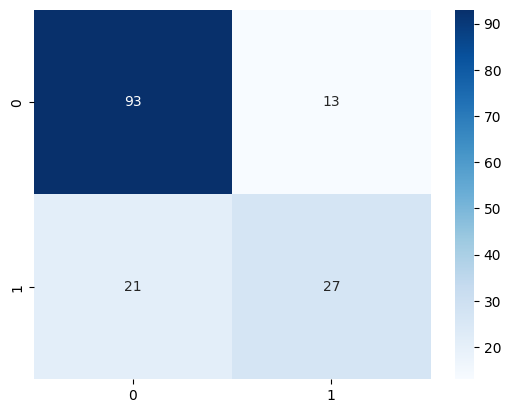

In [10]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(ytest,y_pred)
sns.heatmap(conf_matrix, fmt = 'd', annot = True, cmap = 'Blues')

In [11]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print(accuracy_score(ytest,y_pred))
print(precision_score(ytest,y_pred))
print(recall_score(ytest,y_pred))
print(f1_score(ytest,y_pred))

0.7792207792207793
0.675
0.5625
0.6136363636363636
